In [1]:
import pandas as pd
df_model = pd.read_csv('../data/data-preprocessed.csv',index_col=0)

In [2]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)

def show_elbow(model, ks):
    visualizer = KElbowVisualizer(model, k=ks, timings=False)
    visualizer.fit(df_model)
    visualizer.poof()

def show_silhouette(model, ks):
    visualizer = KElbowVisualizer(model, k=ks, metric='silhouette', timings=False, locate_elbow=False)
    visualizer.fit(df_model)
    visualizer.show()

def show_single_silhouette(model, k):
    palette = sns.color_palette('Set1', k)
    visualizer = SilhouetteVisualizer(model, colors=palette)
    visualizer.fit(df_model)
    clusters = model.fit_predict(df_model)
    score = silhouette_score(df_model, clusters, metric='euclidean')
    print('Silhouette Score for %d clusters: %.3f' % (k, score))
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    means_lst = []
    for label in range(k):
        means_lst.append(sample_silhouette_values[clusters == label].mean())
    print("Silhouette mean for each cluster: ",means_lst)
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    print("Number of negative silhouette values:",np.sum(sample_silhouette_values < 0, axis=0))

def show_silhouette_scores(clusters, k):
    score = silhouette_score(df_model, clusters, metric='euclidean')
    print('Silhouette Score: %.3f' % score)
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    means_lst = []
    for label in range(k):
        means_lst.append(sample_silhouette_values[clusters == label].mean())
    print("Silhouette mean for each cluster:",means_lst)
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    print("Std of silhouette mean:",np.std(means_lst))
    print("Number of negative silhouette values:",np.sum(sample_silhouette_values < 0, axis=0))

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

def show_pca(clusters):
    pca = PCA(n_components=3)
    pca_fit = pca.fit_transform(df_model)
    df_pca = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2', 'PC3'])
    fig, ax = plt.subplots(2, 2, figsize=(15,14))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', palette='Set1', hue=clusters, ax=ax[0][0])
    sns.scatterplot(data=df_pca, x='PC1', y='PC3', palette='Set1', hue=clusters, ax=ax[0][1])
    sns.scatterplot(data=df_pca, x='PC2', y='PC3', palette='Set1', hue=clusters, ax=ax[1][0])
    fig.delaxes(ax[1][1])

def show_parallel_coordinates(clusters):
    fig, ax = plt.subplots(1, 1, figsize=(8,7))
    df_model_par = df_model.copy()
    df_model_par['Cluster'] = clusters
    palette = sns.color_palette('Set1', bestK)
    pd.plotting.parallel_coordinates(df_model_par, 'Cluster', color=palette, ax = ax)

def show_mean_values(clusters):
    print(df_model.groupby(clusters).mean())

def show_boxplots(clusters, variable):
    df_model_box = df_model.copy()
    df_model_box['Cluster'] = clusters
    sns.boxplot(data=df_model_box, x = "Cluster", y = variable, hue="Cluster")

# K-Means

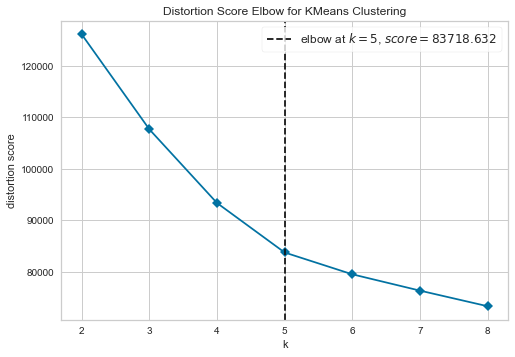

In [3]:
# Determining the best value of k using Elbow
kmeans = KMeans()
show_elbow(kmeans, (2,9))

In [4]:
# Choosing the range to explore
ks = range(3,7)

For 3 clusters:
Silhouette Score: 0.177
Silhouette mean for each cluster: [0.16834618840875018, 0.1695438796770376, 0.19427624652767123]
Std of silhouette mean: 0.011951254459767793
Number of negative silhouette values: 961
For 4 clusters:
Silhouette Score: 0.190
Silhouette mean for each cluster: [0.20340274581229348, 0.20491573991684686, 0.18391504809414458, 0.14727795444786537]
Std of silhouette mean: 0.023234499834381018
Number of negative silhouette values: 1689
For 5 clusters:
Silhouette Score: 0.176
Silhouette mean for each cluster: [0.19699089135115586, 0.18449346994939828, 0.14204883697744614, 0.16680946404495048, 0.17690024006364607]
Std of silhouette mean: 0.01853734445648061
Number of negative silhouette values: 1524
For 6 clusters:
Silhouette Score: 0.156
Silhouette mean for each cluster: [0.1364663275116904, 0.1513770206955147, 0.17646018199661873, 0.15731078563249404, 0.15758024024353512, 0.14902646648047274]
Std of silhouette mean: 0.0120021902085512
Number of negative s

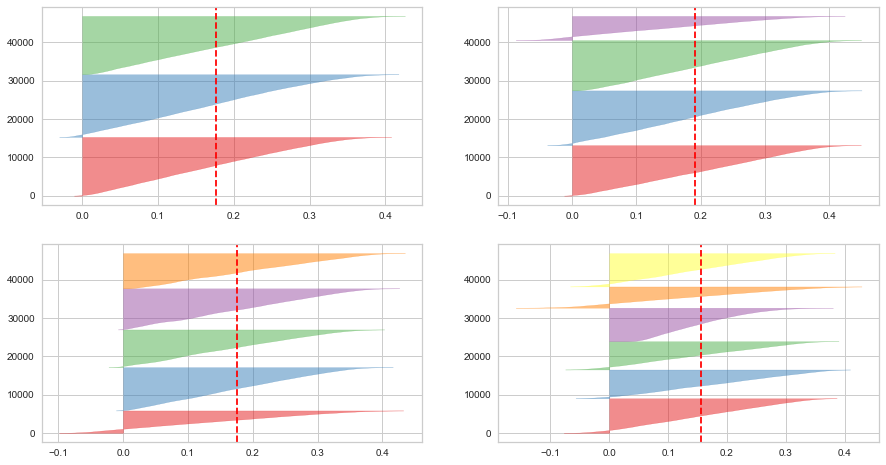

In [5]:
# Comparing silhouettes
fig, ax = plt.subplots(2, 2, figsize=(15,8))
q = 0
mod = 0
for i in ks:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    palette = sns.color_palette('Set1', i)
    visualizer = SilhouetteVisualizer(km, colors=palette, ax=ax[q][mod])
    visualizer.fit(df_model)
    Clusters = km.fit_predict(df_model)
    print("For %d clusters:" % i)
    show_silhouette_scores(Clusters,i)
    if mod == 0:
        mod = 1
    else:
        q = 1
        mod = 0

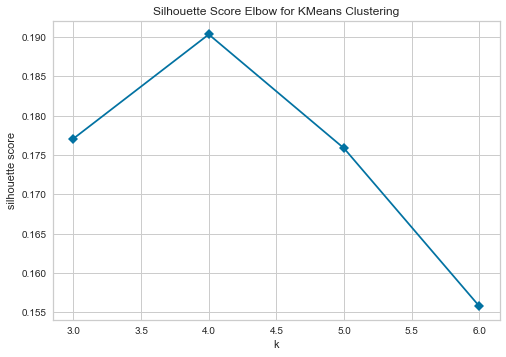

In [6]:
show_silhouette(kmeans, ks)

In [7]:
# Comparing consistency
numIterations = 30
for k in ks:
    consistency = []
    for i in range(numIterations):
        km = KMeans(n_clusters=k, n_init=10, max_iter=100)
        Clusters = km.fit_predict(df_model)
        unique, counts = np.unique(Clusters, return_counts=True)
        consistency.append(max(counts))
    print("For k =",k, "we have\nmean:",np.mean(consistency),"\nstd:",np.std(consistency))

For k = 3 we have
mean: 16355.5 
std: 37.08795851306279
For k = 4 we have
mean: 14362.666666666666 
std: 46.338848592610596
For k = 5 we have
mean: 11320.933333333332 
std: 45.514783922979966
For k = 6 we have
mean: 9036.133333333333 
std: 27.9400946470997


For k = 3 we have as sum of squared distance 96918.6038908405
For k = 4 we have as sum of squared distance 84013.06718563274
For k = 5 we have as sum of squared distance 75344.23021162907
For k = 6 we have as sum of squared distance 71522.7404944215


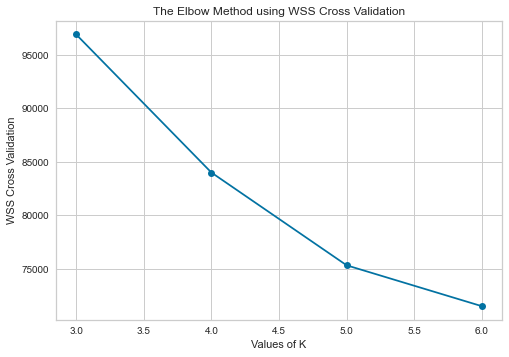

In [8]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
WSSCV = []
for k in ks:
    sum_distance = 0
    for train_index, test_index in kf.split(df_model):
        X_train, X_test = df_model.iloc[train_index,:], df_model.iloc[test_index,:]
        kmeans = KMeans(n_clusters=k, random_state = 0)
        k_fit = kmeans.fit(X_train)
        y_test = kmeans.predict(X_test)
        sum_distance = sum_distance + kmeans.inertia_
    print('For k =', k, 'we have as sum of squared distance', sum_distance / 10)
    WSSCV.append(sum_distance / 10)
plt.plot(ks, WSSCV, 'b-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('WSS Cross Validation')
plt.title('The Elbow Method using WSS Cross Validation')
plt.show()

In [9]:
# Best K for KMeans
bestK = 5

Silhouette Score for 5 clusters: 0.176
Silhouette mean for each cluster:  [0.19775873394019472, 0.1773052714853065, 0.18476685765111778, 0.16626985025056762, 0.14184042950769502]
Number of negative silhouette values: 1557


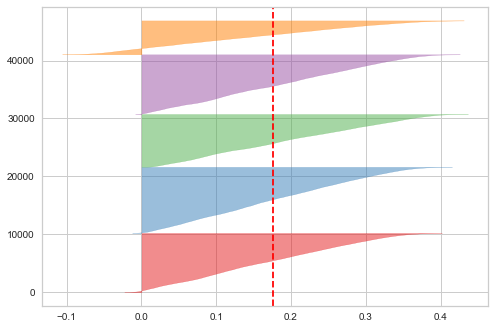

In [11]:
# Silhouette for the best K
km = KMeans(n_clusters=bestK, n_init=10, max_iter=100)
Clusters = km.fit_predict(df_model)
ClustersKMeans = Clusters
show_single_silhouette(km,bestK)

In [12]:
# CHS 
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(df_model,Clusters)

10543.060381698715

In [13]:
# DBI
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_model, Clusters)

1.484090173148942

In [14]:
show_clusters_size(Clusters)

{0: 10234, 1: 11397, 2: 9111, 3: 10288, 4: 5845}


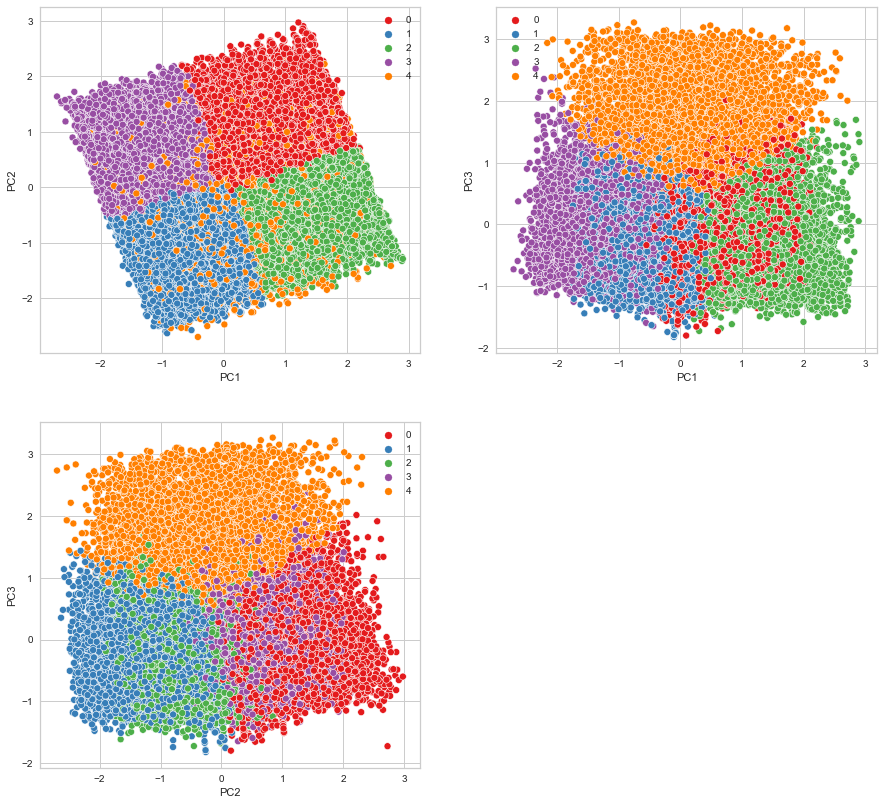

In [15]:
show_pca(Clusters)

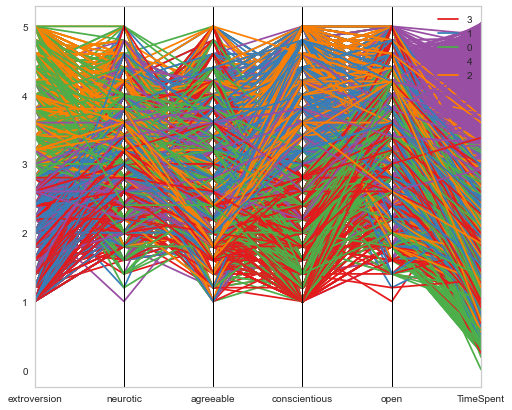

In [16]:
show_parallel_coordinates(Clusters)

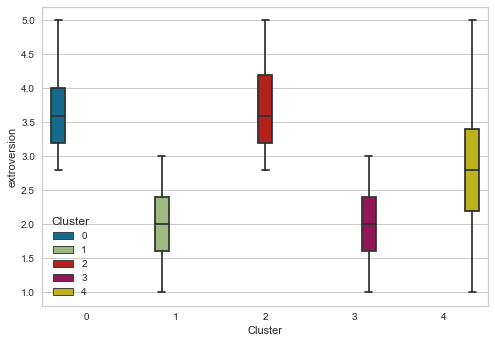

In [17]:
show_boxplots(Clusters, "extroversion")

In [18]:
show_mean_values(Clusters)

   extroversion  neurotic  agreeable  conscientious      open  TimeSpent
0      3.673637  3.165312   2.637971       2.345632  3.734806   1.732917
1      2.027885  3.285444   2.521418       3.805598  3.684864   1.762163
2      3.748151  3.363846   2.406959       3.932411  3.780068   1.803913
3      1.940086  3.048095   2.636547       2.201030  3.663103   1.740330
4      2.821831  3.207083   2.602258       3.130676  3.651668   3.621637


# K-Medoids

/Users/jacopo/venv/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/jacopo/venv/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


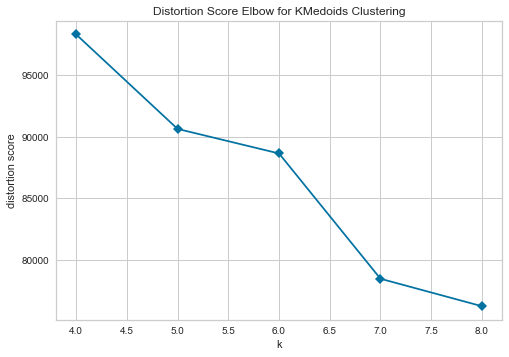

In [19]:
# Determining the best value of k using Elbow
k_medoids = KMedoids()
show_elbow(k_medoids, (4,9))

In [20]:
# Choosing the range to explore
Ks = range(4,8)

For 4 clusters:
Silhouette Score: 0.158
Silhouette mean for each cluster: [0.2456164414830566, 0.19125486096541466, 0.04584715794270241, 0.1574278774508664]
Std of silhouette mean: 0.07304882476238776
Number of negative silhouette values: 5575
For 5 clusters:
Silhouette Score: 0.145
Silhouette mean for each cluster: [0.12164929812372466, 0.17340438030314162, 0.1374974697774884, 0.17596894212784528, 0.09472664487629652]
Std of silhouette mean: 0.030984501817372723
Number of negative silhouette values: 4194
For 6 clusters:
Silhouette Score: 0.134
Silhouette mean for each cluster: [0.11072215746233488, 0.2021909882397055, 0.14623135342505916, 0.1908698511249631, 0.02452086323748455, 0.09799721903200674]
Std of silhouette mean: 0.06012833745935983
Number of negative silhouette values: 6518
For 7 clusters:
Silhouette Score: 0.142
Silhouette mean for each cluster: [0.12945503013341375, 0.18462140438103908, 0.1751324343796998, 0.13602425315077576, 0.06089774638454906, 0.11690422482905631, 0.1

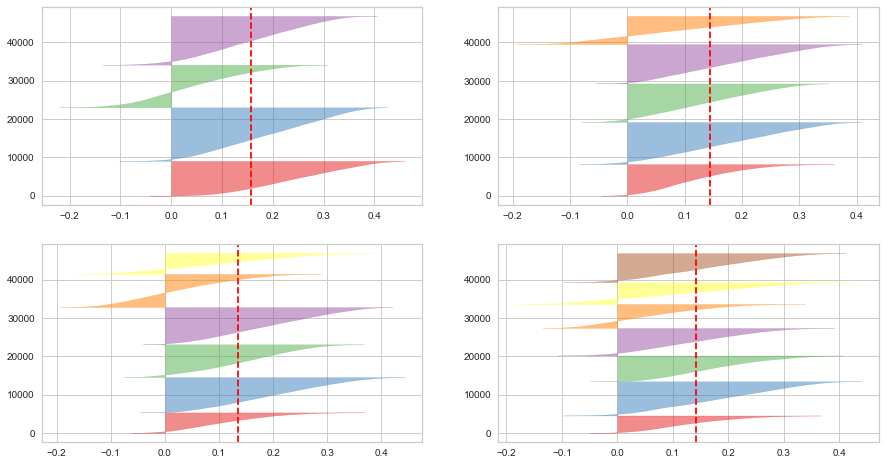

In [21]:
# Comparing silhouettes
fig, ax = plt.subplots(2, 2, figsize=(15,8))
q = 0
mod = 0
for i in Ks:
    k_medoids = KMedoids(n_clusters = i, random_state = 0).fit(df_model)
    palette = sns.color_palette('Set1', i)
    visualizer = SilhouetteVisualizer(k_medoids, colors=palette, ax=ax[q][mod])
    visualizer.fit(df_model)
    Clusters = k_medoids.predict(df_model)
    print("For %d clusters:" % (i))
    show_silhouette_scores(Clusters,i)
    if mod == 0:
        mod = 1
    else:
        q = 1
        mod = 0

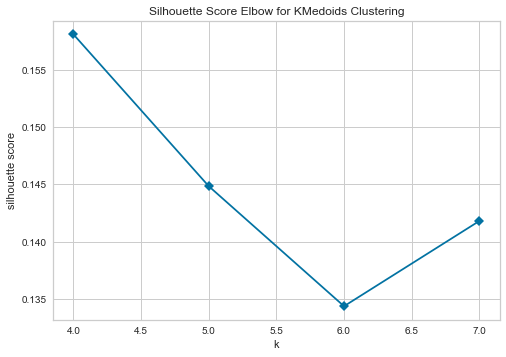

In [22]:
k_medoids = KMedoids()
show_silhouette(k_medoids, Ks)

For k = 4 we have as sum of squared distance 58553.12368998353
For k = 5 we have as sum of squared distance 56169.87914720942
For k = 6 we have as sum of squared distance 54705.04419674425
For k = 7 we have as sum of squared distance 52632.18282800515


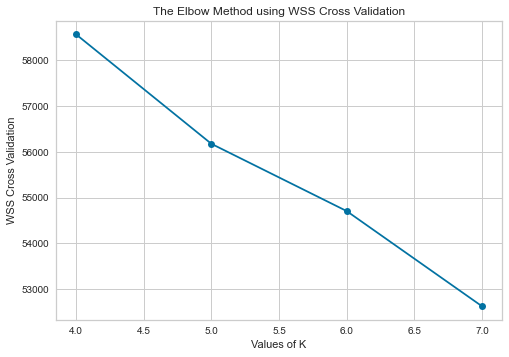

In [23]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
WSSCV = []
for k in Ks:
    sum_distance = 0
    for train_index, test_index in kf.split(df_model):
        X_train, X_test = df_model.iloc[train_index,:], df_model.iloc[test_index,:]
        k_medoids = KMedoids(n_clusters = k, random_state = 0)
        k_fit = k_medoids.fit(X_train)
        y_test = k_medoids.predict(X_test)
        sum_distance = sum_distance + k_medoids.inertia_
    print('For k =', k, 'we have as sum of squared distance', sum_distance / 10)
    WSSCV.append(sum_distance / 10)
plt.plot(Ks, WSSCV, 'b-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('WSS Cross Validation')
plt.title('The Elbow Method using WSS Cross Validation')
plt.show()

In [24]:
# Best K for PAM
bestK = 5

Silhouette Score for 5 clusters: 0.145
Silhouette mean for each cluster:  [0.12161654505484132, 0.17343206772455436, 0.13751646924802916, 0.1759912737648935, 0.09472892360427417]
Number of negative silhouette values: 4193


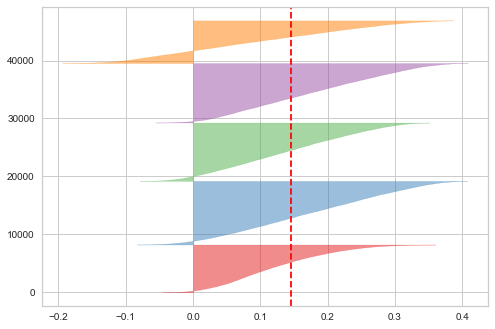

In [25]:
# Silhouette for the best K
k_medoids = KMedoids(n_clusters = bestK)
Clusters = km.fit_predict(df_model)
ClustersKMedoids = Clusters
show_single_silhouette(k_medoids,bestK)

In [26]:
show_clusters_size(Clusters)

{0: 10364, 1: 11375, 2: 10193, 3: 9109, 4: 5834}


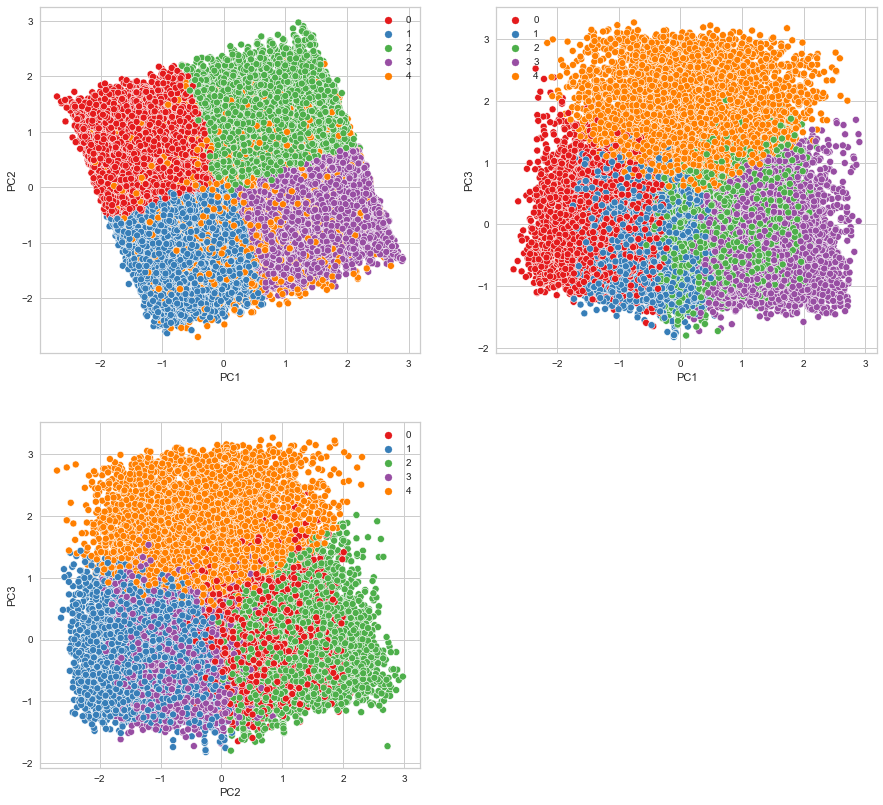

In [27]:
show_pca(Clusters)

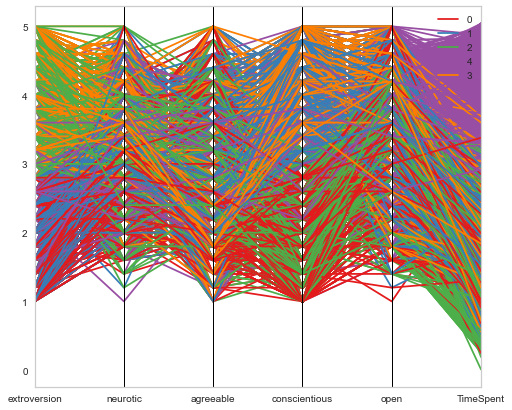

In [28]:
show_parallel_coordinates(Clusters)

In [29]:
show_mean_values(Clusters)

   extroversion  neurotic  agreeable  conscientious      open  TimeSpent
0      1.943323  3.048070   2.637167       2.205326  3.663180   1.739554
1      2.028607  3.286716   2.520563       3.809160  3.685134   1.764251
2      3.676837  3.166036   2.637634       2.344766  3.735407   1.732944
3      3.748930  3.363026   2.407246       3.931277  3.778856   1.803600
4      2.822660  3.206788   2.602400       3.128797  3.652451   3.622986


In [30]:
# CHS

from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(df_model,Clusters)

10543.148709542185

In [31]:
# DBI

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_model, Clusters)

1.4845099279153238

# Confronto con K-Means

In [32]:
# Pair Confusion Matrix for PAM and K-Means
from sklearn.metrics import pair_confusion_matrix

matrix = pair_confusion_matrix(ClustersKMeans, ClustersKMedoids)
print("Percentage Points Same Clusters:", (matrix[0][0]+matrix[1][1]) / (matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]))

Percentage Points Same Clusters: 0.9979409642303481


KMeans required 0.3534667491912842 seconds
KMedoids required 135.1595709323883 seconds


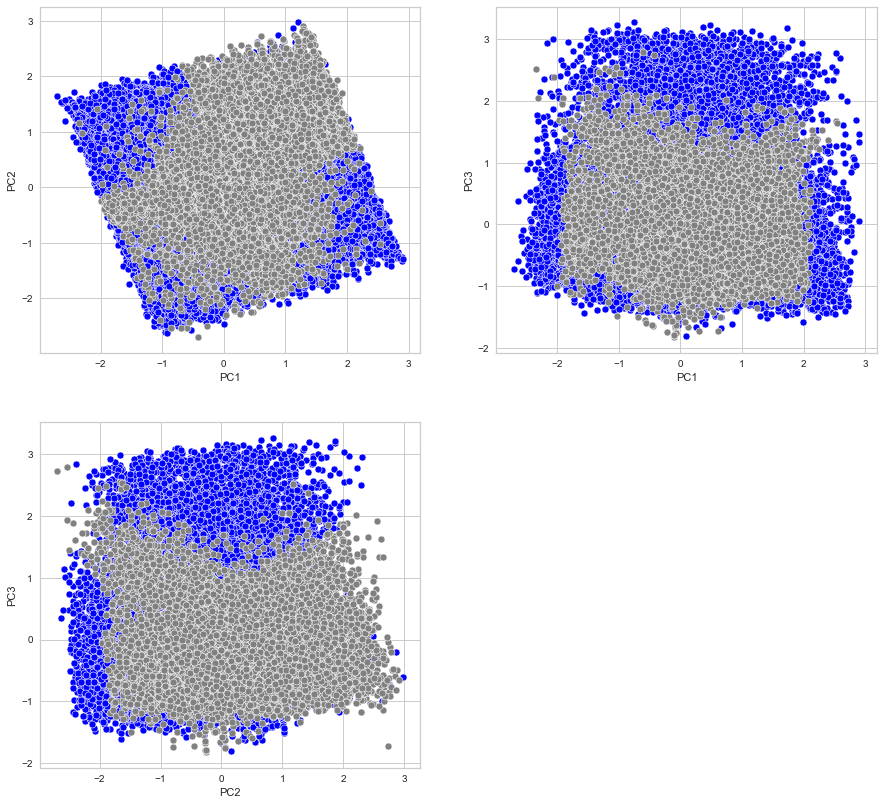

In [33]:
# Comparing time and PCA differences
import time
from sklearn.metrics.pairwise import pairwise_distances_argmin

km = KMeans(init="k-means++", n_clusters=5, n_init=10)
Clusters = km.fit_predict(df_model)
t0 = time.time()
km.fit(df_model)
t_kmeans = time.time() - t0
print("KMeans required", t_kmeans, "seconds")
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2', 'PC3'])
fig, ax = plt.subplots(2, 2, figsize=(15,14))

k_medoids = KMedoids(n_clusters = 5)
Clusters = k_medoids.fit_predict(df_model)
t0 = time.time()
k_medoids.fit(df_model)
t_kmedoids = time.time() - t0
print("KMedoids required", t_kmedoids, "seconds")

k_means_cluster_centers = km.cluster_centers_
order = pairwise_distances_argmin(km.cluster_centers_, k_medoids.cluster_centers_)
k_medoids_cluster_centers = k_medoids.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(df_model, k_means_cluster_centers)
k_medoids_labels = pairwise_distances_argmin(df_model, k_medoids_cluster_centers)
different = k_medoids_labels == 6
for k in range(n_clusters):
    different += (k_means_labels == k) != (k_medoids_labels == k)

identic = np.logical_not(different)
sns.scatterplot(data=df_pca[identic], x='PC1', y='PC2',color="blue",ax=ax[0][0])
sns.scatterplot(data=df_pca[identic], x='PC1', y='PC3',color="blue",ax=ax[0][1])
sns.scatterplot(data=df_pca[identic], x='PC2', y='PC3',color="blue",ax=ax[1][0])
sns.scatterplot(data=df_pca[different], x='PC1', y='PC2',color="grey",ax=ax[0][0])
sns.scatterplot(data=df_pca[different], x='PC1', y='PC3',color="grey", ax=ax[0][1])
sns.scatterplot(data=df_pca[different], x='PC2', y='PC3',color="grey",ax=ax[1][0])
fig.delaxes(ax[1][1])